<a href="https://colab.research.google.com/github/datascientist-hist/Football-Results-classification/blob/OverPredicition/PredictionOver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Soccer Results Classification 

**Championship used Serie A Year 2021/2022**

>The aim of this project is to try to classify  if a game is going to end with a number of goal greater than 2.5,we have the odds of the bookmaker BET365 that can be converted into probabilities and we can use those odds as referencee point ,but our purpose would be beating those odds.

>The strategy that i want to adopt is based on goals scored and goals conceded:

- I will compute the  average goals scored and conceded for each team from all the previous matches 

- and the average goals scored and conceded for each team from the    the last n_matches (that it can be 1 or 2 and so on..) 

>In order to compare the beahviour of the teams between the last n_matches and the total matches



In [13]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns',500)

# Loading Dataset



> Firstly, i scraped  information about the matches from flashscore website but since that it require a lot of time ,i performed furthermore reasearch and i founded a website that provides a lots of detailed info,
so i preferred download a ready dataset



 

In [2]:
data=pd.read_csv('SerieA21-22.csv')

In [3]:
data[['Date','Time',	'HomeTeam',	'AwayTeam',	'FTHG',	'FTAG',	'FTR','B365>2.5','B365<2.5']].head(10)

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365>2.5,B365<2.5
0,21/08/2021,17:30,Inter,Genoa,4,0,H,1.66,2.20
1,21/08/2021,17:30,Verona,Sassuolo,2,3,A,1.90,2.03
2,21/08/2021,19:45,Empoli,Lazio,1,3,A,1.72,2.10
3,21/08/2021,19:45,Torino,Atalanta,1,2,A,1.57,2.37
4,22/08/2021,17:30,Bologna,Salernitana,3,2,H,1.80,2.00
5,22/08/2021,17:30,Udinese,Juventus,2,2,D,1.72,2.10
6,22/08/2021,19:45,Napoli,Venezia,2,0,H,1.44,2.75
7,22/08/2021,19:45,Roma,Fiorentina,3,1,H,1.66,2.20
8,23/08/2021,17:30,Cagliari,Spezia,2,2,D,1.90,1.90
9,23/08/2021,19:45,Sampdoria,Milan,0,1,A,1.80,2.00


In [4]:
data.shape

(380, 105)

In [5]:
data.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=105)

#EDA and Feature Engineering

In this part of the analysis  i will execute the following steps:

> First of all i have to create  the target variable: 
>
> *target* 
>
> 1 -> Over 2.5
>  
> 0 -> Under 2.5

> Then  i am going to take a look to some  variables in order to have a general overview, after i will compute the accuracy according to the odds of the bet365 website in order to have a metric to compare

>At this point i will perform feature engineering,i should  compute the average  stats of the last 5(or another number) matches for each team,and the the average  stats of the total previous  matches for each team



## Target Variables



> To create the target variables i just need to look at the final result,more precisily i am going to look at the variables *FTHG* and *FTAG*,i will sum their value and convert it into a binary variable 



> 1 means Over 2.5
>
> 0 means Under 2.5





In [6]:
dft=data[['FTHG','FTAG','B365>2.5','B365<2.5']]
target=[]
predB365=[]
for i in (range(len(dft))):
  sum=dft['FTHG'].iloc[i]+dft['FTAG'].iloc[i]
  if(sum>2):target.append(1)
  else:target.append(0)
  if(dft['B365>2.5'].iloc[i]<dft['B365<2.5'].iloc[i]):predB365.append(1)
  else:predB365.append(0)
    

In [8]:
#I will compute the accuracy of the odds
from sklearn import metrics
accuracy = metrics.accuracy_score(target, predB365)
accuracy

0.5789473684210527

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

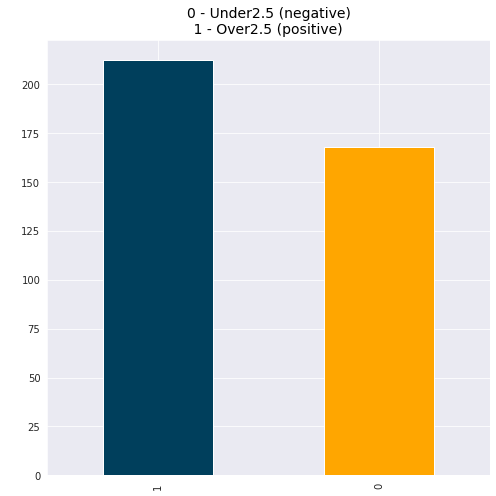

In [15]:
#Number of occurences in target variable
target=pd.Series(target)

plt.figure(figsize=(7,7))
colors = ['#003f5c', '#ffa600']
target.value_counts().plot.bar(ylabel=' ',color=colors)
plt.title(f'0 - Under2.5 (negative)\n 1 - Over2.5 (positive) ', size=14, c='black')
plt.tight_layout()
plt.show() 

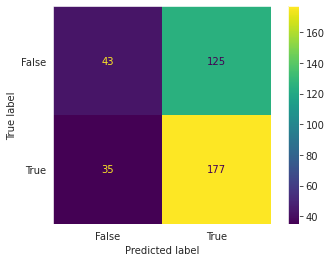

In [16]:
#Misclassification Error
confusion_matrix = metrics.confusion_matrix(target, predB365)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.grid(b=None)
plt.show()

In [25]:
#Precision score over 2.5 and under 2.5
precision_positive = metrics.precision_score(target, predB365, pos_label=1)
precision_negative = metrics.precision_score(target, predB365, pos_label=0)
print(f"Precision score over2.5:  {precision_positive}\nPrecision score under2.5:  {precision_negative}\nAccuracy:  {accuracy}")

Precision score over2.5:  0.5860927152317881
Precision score under2.5:  0.5512820512820513
Accuracy:  0.5789473684210527


>To be competitive i should do better than those metrics


In [103]:
#Creating Target Variables,this method is not optimized, work well with few data but with a lot of data there could be problem
awayteamwin=[]
hometeamwin=[]
WinAwayTeam1st=[]
WinHomeTeam1st=[]

for index in range(len(data)):
    if(data['TotGolHome'].iloc[index]>data['TotGolAway'].iloc[index]):
       hometeamwin.append(1)
       awayteamwin.append(0)

    elif(data['TotGolHome'].iloc[index]<data['TotGolAway'].iloc[index]):
       awayteamwin.append(1)
       hometeamwin.append(0)

    else: 
        awayteamwin.append(0)
        hometeamwin.append(0)

for index in range(len(data)):
    if(data['FirstTimeGolHome'].iloc[index]>data['FirstTimeGolAway'].iloc[index]):
       WinHomeTeam1st.append(1)
       WinAwayTeam1st.append(0)

    elif(data['FirstTimeGolHome'].iloc[index]<data['FirstTimeGolAway'].iloc[index]):
       WinAwayTeam1st.append(1)
       WinHomeTeam1st.append(0)

    else: 
        WinAwayTeam1st.append(0)
        WinHomeTeam1st.append(0)



In [104]:

data['hometeamwin']=hometeamwin
data['awayteamwin']=awayteamwin
data['WinAwayTeam1st']=WinAwayTeam1st
data['WinHomeTeam1st']=WinHomeTeam1st

##EDA

In [10]:
data.head()

,Code,Date,TeamHome,TeamAway,FirstTimeGolHome,FirstTimeGolAway,TotGolHome,TotGolAway,ballposshome,ballpossaway,shottargethome,shottargetaway,shotouthome,shotoutaway,shotblockhome,shotblockaway,punizionihome,punizioniaway,calciangolohome,calciangoloaway,offsidehome,rimlateralihome,rimlateraliaway,paratehome,parateaway,fallihome,falliaway,redcardhome,redcardaway,yellowcardhome,yellowcardaway,totalpassageshome,totalpassagesaway,contrastshome,contrastsaway,attackhome,attackaway,dangerattackhome,dangerattackaway,offsideaway,formationhome,formationaway,ScoredSecondTimeHome,ScoredSecondTimeAway,BothScoredSecondTime,hometeamwin,awayteamwin
0,g_1_pAHymvy1,22.05. 21:00,Salernitana,Udinese,0,3,0,4,46.0,54.0,7.0,6.0,4.0,3.0,0.0,2.0,8.0,6.0,3.0,1.0,1.0,5.0,5.0,3.0,7.0,6.0,7.0,0.0,0.0,1.0,0.0,159.0,192.0,8.0,11.0,60.0,43.0,25.0,27.0,1.0,3 - 5 - 2,3 - 5 - 2,0,1,0,0,1
1,g_1_6HRehZCt,22.05. 21:00,Venezia,Cagliari,0,0,0,0,48.0,52.0,0.0,2.0,3.0,3.0,1.0,2.0,11.0,6.0,2.0,3.0,2.0,7.0,7.0,2.0,0.0,4.0,11.0,0.0,0.0,0.0,1.0,186.0,201.0,11.0,7.0,38.0,74.0,17.0,27.0,0.0,3 - 4 - 2 - 1,3 - 5 - 2,0,0,0,0,0
2,g_1_OfTSl06l,22.05. 18:00,Inter,Sampdoria,0,0,3,0,56.0,44.0,5.0,0.0,5.0,2.0,8.0,0.0,7.0,4.0,6.0,1.0,0.0,8.0,3.0,0.0,5.0,4.0,7.0,0.0,0.0,1.0,1.0,265.0,199.0,5.0,6.0,56.0,24.0,50.0,7.0,0.0,3 - 5 - 2,4 - 1 - 4 - 1,1,0,0,1,0
3,g_1_EqMunbj7,22.05. 18:00,Sassuolo,Milan,0,3,0,3,56.0,44.0,1.0,11.0,3.0,2.0,2.0,2.0,10.0,4.0,1.0,6.0,0.0,3.0,5.0,8.0,1.0,4.0,9.0,0.0,0.0,1.0,1.0,156.0,107.0,9.0,8.0,41.0,35.0,10.0,34.0,0.0,4 - 3 - 3,4 - 2 - 3 - 1,0,0,0,0,1
4,g_1_hzLqoI5D,22.05. 12:30,Spezia,Napoli,0,3,0,3,28.0,72.0,2.0,4.0,4.0,0.0,0.0,2.0,3.0,8.0,1.0,1.0,1.0,3.0,8.0,1.0,2.0,7.0,3.0,0.0,0.0,1.0,0.0,114.0,319.0,7.0,2.0,31.0,52.0,15.0,23.0,0.0,4 - 2 - 3 - 1,4 - 2 - 3 - 1,0,0,0,0,1


In [628]:
data['hometeamwin'].value_counts()

0    232
1    148
Name: hometeamwin, dtype: int64

In [629]:
data['awayteamwin'].value_counts()

0    246
1    134
Name: awayteamwin, dtype: int64

In [634]:
print(380-134-148)

98


In [218]:
#print(148/380)
#print(134/380)
#print(98/380)


We can observe that during the year 2021/2022 in the Italian Serie A championship there has been:
- 39%  home victory
- 35%  away victory
- 26%  drawn


In [105]:
data['WinAwayTeam1st'].value_counts()

0    263
1    117
Name: WinAwayTeam1st, dtype: int64

In [106]:
data['WinHomeTeam1st'].value_counts()

0    249
1    131
Name: WinHomeTeam1st, dtype: int64

In [217]:
#print(131/380)
#print(117/380)
#print((380-131-117)/380)

We can observe that during the year 2021/2022 in the Italian Serie A championship there has been in the 1st half:
- 35%  home victory
- 30%  away victory
- 35%  drawn

I wanto to examine in which time there more goal 1st or 2nd?

In [220]:
first=0
second=0
total=0
for i in range(len(data)):
  first=data['FirstTimeGolHome'].iloc[i]+data['FirstTimeGolAway'].iloc[i]+first
  total=data['TotGolHome'].iloc[i]+data['TotGolAway'].iloc[i]+total

second=total-first

print(f'Goal First Half{first} ---Goal Second Half {second} ---Total Goal{total}')



Goal First Half493 ---Goal Second Half 596 ---Total Goal1089


In [244]:
total=[]
for i in range(len(data)):
  total.append(data['FirstTimeGolHome'].iloc[i]+data['FirstTimeGolAway'].iloc[i])
  

In [246]:
data['TotGol1Half']=total

In [249]:
over1and5=[]
for i in range(len(data)):
  if(data['TotGol1Half'].iloc[i]>1):over1and5.append(1)
  else:over1and5.append(0) 

In [250]:
data['over1and5']=over1and5

In [247]:
data['TotGol1Half'].value_counts()

1    147
0     97
2     78
3     43
4     14
5      1
Name: TotGol1Half, dtype: int64

In [252]:
data['over1and5'].value_counts()

0    244
1    136
Name: over1and5, dtype: int64

In [117]:
data['formationhome'].value_counts()

4 - 2 - 3 - 1    83
4 - 3 - 3        77
3 - 5 - 2        71
3 - 4 - 2 - 1    65
4 - 3 - 1 - 2    26
4 - 4 - 2        22
3 - 4 - 1 - 2    11
4 - 3 - 2 - 1     9
3 - 5 - 1 - 1     5
3 - 4 - 3         4
3 - 1 - 4 - 2     2
4 - 1 - 4 - 1     1
5 - 3 - 1 - 1     1
5 - 3 - 2         1
4 - 4 - 1 - 1     1
4 - 5 - 1         1
Name: formationhome, dtype: int64

In [118]:
data['TeamAway'].value_counts()

Udinese        19
Cagliari       19
Torino         19
Spezia         19
Venezia        19
Sassuolo       19
Genoa          19
Atalanta       19
Inter          19
Fiorentina     19
Lazio          19
Roma           19
Bologna        19
Verona         19
Juventus       19
Empoli         19
Napoli         19
Milan          19
Sampdoria      19
Salernitana    19
Name: TeamAway, dtype: int64

In [253]:
# i will drop code feature because it is not useful for the analysis
df=data.copy()
df=df.drop(['Code'],axis=1)

In [110]:
df.columns

Index(['Date', 'TeamHome', 'TeamAway', 'FirstTimeGolHome', 'FirstTimeGolAway',
       'TotGolHome', 'TotGolAway', 'ballposshome', 'ballpossaway',
       'shottargethome', 'shottargetaway', 'shotouthome', 'shotoutaway',
       'shotblockhome', 'shotblockaway', 'punizionihome', 'punizioniaway',
       'calciangolohome', 'calciangoloaway', 'offsidehome', 'rimlateralihome',
       'rimlateraliaway', 'paratehome', 'parateaway', 'fallihome', 'falliaway',
       'redcardhome', 'redcardaway', 'yellowcardhome', 'yellowcardaway',
       'totalpassageshome', 'totalpassagesaway', 'contrastshome',
       'contrastsaway', 'attackhome', 'attackaway', 'dangerattackhome',
       'dangerattackaway', 'offsideaway', 'formationhome', 'formationaway',
       'ScoredSecondTimeHome', 'ScoredSecondTimeAway', 'BothScoredSecondTime',
       'hometeamwin', 'awayteamwin', 'WinAwayTeam1st', 'WinHomeTeam1st'],
      dtype='object')

##I will divid the date feature date in date and hour

In [254]:
df[['Date', 'Hour']] = df['Date'].str.split(' ', 1, expand=True)

In [255]:
df['Hour'] = df['Hour'].str[:2]
df['Date'] = df['Date'].str[:5]
df['Date']= df['Date'].str.replace(".","/")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [256]:
df["Hour"] = pd.to_numeric(df["Hour"])

In [114]:
df.head()

,Date,TeamHome,TeamAway,FirstTimeGolHome,FirstTimeGolAway,TotGolHome,TotGolAway,ballposshome,ballpossaway,shottargethome,shottargetaway,shotouthome,shotoutaway,shotblockhome,shotblockaway,punizionihome,punizioniaway,calciangolohome,calciangoloaway,offsidehome,rimlateralihome,rimlateraliaway,paratehome,parateaway,fallihome,falliaway,redcardhome,redcardaway,yellowcardhome,yellowcardaway,totalpassageshome,totalpassagesaway,contrastshome,contrastsaway,attackhome,attackaway,dangerattackhome,dangerattackaway,offsideaway,formationhome,formationaway,ScoredSecondTimeHome,ScoredSecondTimeAway,BothScoredSecondTime,hometeamwin,awayteamwin,WinAwayTeam1st,WinHomeTeam1st,Hour
0,22/05,Salernitana,Udinese,0,3,0,4,46.0,54.0,7.0,6.0,4.0,3.0,0.0,2.0,8.0,6.0,3.0,1.0,1.0,5.0,5.0,3.0,7.0,6.0,7.0,0.0,0.0,1.0,0.0,159.0,192.0,8.0,11.0,60.0,43.0,25.0,27.0,1.0,3 - 5 - 2,3 - 5 - 2,0,1,0,0,1,1,0,21
1,22/05,Venezia,Cagliari,0,0,0,0,48.0,52.0,0.0,2.0,3.0,3.0,1.0,2.0,11.0,6.0,2.0,3.0,2.0,7.0,7.0,2.0,0.0,4.0,11.0,0.0,0.0,0.0,1.0,186.0,201.0,11.0,7.0,38.0,74.0,17.0,27.0,0.0,3 - 4 - 2 - 1,3 - 5 - 2,0,0,0,0,0,0,0,21
2,22/05,Inter,Sampdoria,0,0,3,0,56.0,44.0,5.0,0.0,5.0,2.0,8.0,0.0,7.0,4.0,6.0,1.0,0.0,8.0,3.0,0.0,5.0,4.0,7.0,0.0,0.0,1.0,1.0,265.0,199.0,5.0,6.0,56.0,24.0,50.0,7.0,0.0,3 - 5 - 2,4 - 1 - 4 - 1,1,0,0,1,0,0,0,18
3,22/05,Sassuolo,Milan,0,3,0,3,56.0,44.0,1.0,11.0,3.0,2.0,2.0,2.0,10.0,4.0,1.0,6.0,0.0,3.0,5.0,8.0,1.0,4.0,9.0,0.0,0.0,1.0,1.0,156.0,107.0,9.0,8.0,41.0,35.0,10.0,34.0,0.0,4 - 3 - 3,4 - 2 - 3 - 1,0,0,0,0,1,1,0,18
4,22/05,Spezia,Napoli,0,3,0,3,28.0,72.0,2.0,4.0,4.0,0.0,0.0,2.0,3.0,8.0,1.0,1.0,1.0,3.0,8.0,1.0,2.0,7.0,3.0,0.0,0.0,1.0,0.0,114.0,319.0,7.0,2.0,31.0,52.0,15.0,23.0,0.0,4 - 2 - 3 - 1,4 - 2 - 3 - 1,0,0,0,0,1,1,0,12


In [17]:
df.tail()

,Date,TeamHome,TeamAway,FirstTimeGolHome,FirstTimeGolAway,TotGolHome,TotGolAway,ballposshome,ballpossaway,shottargethome,shottargetaway,shotouthome,shotoutaway,shotblockhome,shotblockaway,punizionihome,punizioniaway,calciangolohome,calciangoloaway,offsidehome,rimlateralihome,rimlateraliaway,paratehome,parateaway,fallihome,falliaway,redcardhome,redcardaway,yellowcardhome,yellowcardaway,totalpassageshome,totalpassagesaway,contrastshome,contrastsaway,attackhome,attackaway,dangerattackhome,dangerattackaway,offsideaway,formationhome,formationaway,ScoredSecondTimeHome,ScoredSecondTimeAway,BothScoredSecondTime,hometeamwin,awayteamwin,Hour
375,22/08,Udinese,Juventus,0,2,2,2,50.0,50.0,1.0,2.0,1.0,2.0,1.0,0.0,9.0,8.0,3.0,2.0,0.0,0.0,1.0,6.0,8.0,202.0,232.0,0.0,0.0,1.0,2.0,234.0,68.0,3.0,5.0,69.0,51.0,21.0,23.0,0.0,3 - 5 - 1 - 1,4 - 4 - 2,1,0,0,0,0,18
376,21/08,Empoli,Lazio,1,3,1,3,42.0,58.0,2.0,4.0,3.0,0.0,0.0,1.0,7.0,1.0,1.0,3.0,2.0,1.0,1.0,6.0,6.0,1.0,1.0,0.0,0.0,0.0,0.0,152.0,228.0,4.0,18.0,47.0,56.0,14.0,34.0,0.0,4 - 3 - 1 - 2,4 - 3 - 3,0,0,0,0,1,20
377,21/08,Torino,Atalanta,0,1,1,2,55.0,45.0,5.0,1.0,1.0,1.0,4.0,1.0,4.0,3.0,2.0,0.0,0.0,0.0,5.0,3.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,169.0,159.0,5.0,9.0,83.0,40.0,27.0,10.0,0.0,3 - 4 - 2 - 1,3 - 4 - 3,1,1,1,0,1,20
378,21/08,Inter,Genoa,2,0,4,0,68.0,32.0,3.0,0.0,3.0,2.0,3.0,1.0,4.0,8.0,6.0,0.0,1.0,0.0,1.0,8.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,277.0,152.0,9.0,4.0,66.0,24.0,33.0,10.0,1.0,3 - 5 - 1 - 1,3 - 4 - 1 - 2,1,0,0,1,0,18
379,21/08,Verona,Sassuolo,0,1,2,3,48.0,52.0,1.0,4.0,7.0,2.0,1.0,1.0,4.0,7.0,4.0,2.0,0.0,3.0,1.0,5.0,6.0,1.0,0.0,0.0,0.0,2.0,1.0,139.0,141.0,8.0,4.0,49.0,25.0,30.0,12.0,1.0,3 - 4 - 2 - 1,4 - 2 - 3 - 1,1,1,1,0,1,18


##Feature Engineering

- I will compute the average gol scored and conceded by home  and away team when they play respectively home and away from the previuos n matches 

- and the total average goal scored and conceded for each team from the previous 5 matches

- i will compute also the average for each stats from the last n matches

- the rows are already orderd from from most recent to least recent

In [312]:
n_previous_matches=2

In [116]:
# i have to find the start and end index from stats columns
#start=3
#end=37+1
df.columns[3:38]

Index(['FirstTimeGolHome', 'FirstTimeGolAway', 'TotGolHome', 'TotGolAway',
       'ballposshome', 'ballpossaway', 'shottargethome', 'shottargetaway',
       'shotouthome', 'shotoutaway', 'shotblockhome', 'shotblockaway',
       'punizionihome', 'punizioniaway', 'calciangolohome', 'calciangoloaway',
       'offsidehome', 'rimlateralihome', 'rimlateraliaway', 'paratehome',
       'parateaway', 'fallihome', 'falliaway', 'redcardhome', 'redcardaway',
       'yellowcardhome', 'yellowcardaway', 'totalpassageshome',
       'totalpassagesaway', 'contrastshome', 'contrastsaway', 'attackhome',
       'attackaway', 'dangerattackhome', 'dangerattackaway'],
      dtype='object')

In [20]:
df.iloc[:,3:38]

,FirstTimeGolHome,FirstTimeGolAway,TotGolHome,TotGolAway,ballposshome,ballpossaway,shottargethome,shottargetaway,shotouthome,shotoutaway,shotblockhome,shotblockaway,punizionihome,punizioniaway,calciangolohome,calciangoloaway,offsidehome,rimlateralihome,rimlateraliaway,paratehome,parateaway,fallihome,falliaway,redcardhome,redcardaway,yellowcardhome,yellowcardaway,totalpassageshome,totalpassagesaway,contrastshome,contrastsaway,attackhome,attackaway,dangerattackhome,dangerattackaway
0,0,3,0,4,46.0,54.0,7.0,6.0,4.0,3.0,0.0,2.0,8.0,6.0,3.0,1.0,1.0,5.0,5.0,3.0,7.0,6.0,7.0,0.0,0.0,1.0,0.0,159.0,192.0,8.0,11.0,60.0,43.0,25.0,27.0
1,0,0,0,0,48.0,52.0,0.0,2.0,3.0,3.0,1.0,2.0,11.0,6.0,2.0,3.0,2.0,7.0,7.0,2.0,0.0,4.0,11.0,0.0,0.0,0.0,1.0,186.0,201.0,11.0,7.0,38.0,74.0,17.0,27.0
2,0,0,3,0,56.0,44.0,5.0,0.0,5.0,2.0,8.0,0.0,7.0,4.0,6.0,1.0,0.0,8.0,3.0,0.0,5.0,4.0,7.0,0.0,0.0,1.0,1.0,265.0,199.0,5.0,6.0,56.0,24.0,50.0,7.0
3,0,3,0,3,56.0,44.0,1.0,11.0,3.0,2.0,2.0,2.0,10.0,4.0,1.0,6.0,0.0,3.0,5.0,8.0,1.0,4.0,9.0,0.0,0.0,1.0,1.0,156.0,107.0,9.0,8.0,41.0,35.0,10.0,34.0
4,0,3,0,3,28.0,72.0,2.0,4.0,4.0,0.0,0.0,2.0,3.0,8.0,1.0,1.0,1.0,3.0,8.0,1.0,2.0,7.0,3.0,0.0,0.0,1.0,0.0,114.0,319.0,7.0,2.0,31.0,52.0,15.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0,2,2,2,50.0,50.0,1.0,2.0,1.0,2.0,1.0,0.0,9.0,8.0,3.0,2.0,0.0,0.0,1.0,6.0,8.0,202.0,232.0,0.0,0.0,1.0,2.0,234.0,68.0,3.0,5.0,69.0,51.0,21.0,23.0
376,1,3,1,3,42.0,58.0,2.0,4.0,3.0,0.0,0.0,1.0,7.0,1.0,1.0,3.0,2.0,1.0,1.0,6.0,6.0,1.0,1.0,0.0,0.0,0.0,0.0,152.0,228.0,4.0,18.0,47.0,56.0,14.0,34.0
377,0,1,1,2,55.0,45.0,5.0,1.0,1.0,1.0,4.0,1.0,4.0,3.0,2.0,0.0,0.0,0.0,5.0,3.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,169.0,159.0,5.0,9.0,83.0,40.0,27.0,10.0
378,2,0,4,0,68.0,32.0,3.0,0.0,3.0,2.0,3.0,1.0,4.0,8.0,6.0,0.0,1.0,0.0,1.0,8.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,277.0,152.0,9.0,4.0,66.0,24.0,33.0,10.0


In [47]:
#example to understand code
adf=df.iloc[0:,:].copy()
adf[adf['TeamHome']=='Salernitana']['TotGolHome'].iloc[1:n_previous_matches+1].index


Int64Index([22, 30, 49, 82, 103], dtype='int64')

In [29]:
#example replace value
adf['TotGolHome'].iloc[0]=0
adf['TotGolHome'].iloc[0]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0

In [30]:
copy_df=df.iloc[:(380-n_previous_matches*10),3:38]
copy_df=copy_df.drop('offsidehome',axis=1)
copy_df.columns


Index(['FirstTimeGolHome', 'FirstTimeGolAway', 'TotGolHome', 'TotGolAway',
       'ballposshome', 'ballpossaway', 'shottargethome', 'shottargetaway',
       'shotouthome', 'shotoutaway', 'shotblockhome', 'shotblockaway',
       'punizionihome', 'punizioniaway', 'calciangolohome', 'calciangoloaway',
       'rimlateralihome', 'rimlateraliaway', 'paratehome', 'parateaway',
       'fallihome', 'falliaway', 'redcardhome', 'redcardaway',
       'yellowcardhome', 'yellowcardaway', 'totalpassageshome',
       'totalpassagesaway', 'contrastshome', 'contrastsaway', 'attackhome',
       'attackaway', 'dangerattackhome', 'dangerattackaway'],
      dtype='object')

In [313]:
from tables.index import idx2long
#new columns
avgGoalHomeatH=[]
avgGoalConcededatH=[]
avgGoalAwayatA=[]
avgGoalConcededatA=[]
avgGoalHome=[]
avgGoalConcededHome=[]
avgGoalAway=[]
avgGoalConcededAway=[]
#Instead of create a new dataframe  i will fill a copy 
#Since that i need n previous matches to perform avg i have to wait from the 
#start of the championship n_previous_matches that means several days of championship

#For each unit i don't have to use 10 rows from the last,i explain me better
#i will use those rows to compute the stats but not to train the model
#n_previous_matches*10 
#10 means 10 matches for each week of championship


copy_df=df.iloc[:(380-n_previous_matches*10),3:38]
copy_df=copy_df.drop('offsidehome',axis=1)

pddict={}
for idx in reversed(range(len(df)-n_previous_matches*10)):
  teamhome=df['TeamHome'].iloc[idx]
  teamaway=df['TeamAway'].iloc[idx]
  auxdf=df.iloc[idx:,:].copy()

  avgGoalHomeatH.append(auxdf[auxdf['TeamHome']==teamhome]['TotGolHome'].iloc[1:n_previous_matches+1].mean())
  avgGoalConcededatH.append(auxdf[auxdf['TeamHome']==teamhome]['TotGolAway'].iloc[1:n_previous_matches+1].mean())

  avgGoalAwayatA.append(auxdf[auxdf['TeamAway']==teamaway]['TotGolAway'].iloc[1:n_previous_matches+1].mean())
  avgGoalConcededatA.append(auxdf[auxdf['TeamAway']==teamaway]['TotGolHome'].iloc[1:n_previous_matches+1].mean())

  #team home avg gol scored 
  sumhome=auxdf[auxdf['TeamHome']==teamhome]['TotGolHome'].iloc[1:n_previous_matches+1].sum()
  tot=auxdf[auxdf['TeamHome']==teamhome]['TotGolHome'].iloc[1:n_previous_matches+1].count()

  sumaway=auxdf[auxdf['TeamAway']==teamhome]['TotGolAway'].iloc[1:n_previous_matches+1].sum()
  tot=tot+auxdf[auxdf['TeamAway']==teamhome]['TotGolAway'].iloc[1:n_previous_matches+1].count()

  avgGoalHome.append((sumhome+sumaway)/tot)

  #and conceded
  sumhome=auxdf[auxdf['TeamHome']==teamhome]['TotGolAway'].iloc[1:n_previous_matches+1].sum()
  tot=auxdf[auxdf['TeamHome']==teamhome]['TotGolAway'].iloc[1:n_previous_matches+1].count()

  sumaway=auxdf[auxdf['TeamAway']==teamhome]['TotGolHome'].iloc[1:n_previous_matches+1].sum()
  tot=tot+auxdf[auxdf['TeamAway']==teamhome]['TotGolHome'].iloc[1:n_previous_matches+1].count()

  avgGoalConcededHome.append((sumhome+sumaway)/tot)
  #team away avg goal scored

  sumhome=auxdf[auxdf['TeamHome']==teamaway]['TotGolHome'].iloc[1:n_previous_matches+1].sum()
  tot=auxdf[auxdf['TeamHome']==teamaway]['TotGolHome'].iloc[1:n_previous_matches+1].count()

  sumaway=auxdf[auxdf['TeamAway']==teamaway]['TotGolAway'].iloc[1:n_previous_matches+1].sum()
  tot=tot+auxdf[auxdf['TeamAway']==teamaway]['TotGolAway'].iloc[1:n_previous_matches+1].count()
  avgGoalAway.append((sumhome+sumaway)/tot)
  #and conceded
  sumhome=auxdf[auxdf['TeamHome']==teamaway]['TotGolAway'].iloc[1:n_previous_matches+1].sum()
  tot=auxdf[auxdf['TeamHome']==teamaway]['TotGolAway'].iloc[1:n_previous_matches+1].count()

  sumaway=auxdf[auxdf['TeamAway']==teamaway]['TotGolHome'].iloc[1:n_previous_matches+1].sum()
  tot=tot+auxdf[auxdf['TeamAway']==teamaway]['TotGolHome'].iloc[1:n_previous_matches+1].count()
  avgGoalConcededAway.append((sumhome+sumaway)/tot)

  for col in range(0,int(len(copy_df.columns)),2):

      col_name=copy_df.columns[col]
      col_nameplus=copy_df.columns[(col+1)]
      #Home Team
     #tot=auxdf[col_name].loc[(auxdf['TeamHome'].str.contains(teamhome) == True) | (auxdf['TeamAway'].str.contains(teamhome) == True)].iloc[1:n_previous_matches+1].count()
      obs=auxdf[col_name].loc[((auxdf['TeamHome'].str.contains(teamhome) ) == True )|( (auxdf['TeamAway'].str.contains(teamhome)) == True)].iloc[1:n_previous_matches+1].index
      dft=auxdf.loc[obs]

      sumhomestats=dft[dft['TeamHome']==teamhome][col_name].sum()
      counthomestats=dft[dft['TeamHome']==teamhome][col_name].count()

      sumhomeawaystats=dft[dft['TeamAway']==teamhome][col_nameplus].sum()
      counthomeawaystats=dft[dft['TeamAway']==teamhome][col_nameplus].count()

      copy_df[col_name].iloc[idx]=((sumhomestats+sumhomeawaystats)/(counthomestats+counthomeawaystats))

      #Away Team
      
      #tot=auxdf[col_nameplus].loc[(auxdf['TeamHome'].str.contains(teamaway) == True )| (auxdf['TeamAway'].str.contains(teamaway) == True].iloc[1:n_previous_matches+1].count()

      obs=auxdf[col_nameplus].loc[(auxdf['TeamHome'].str.contains(teamaway) == True )| (auxdf['TeamAway'].str.contains(teamaway) == True)].iloc[1:n_previous_matches+1].index
      dft=auxdf.loc[obs]

      sumhomestats=dft[dft['TeamHome']==teamaway][col_name].sum()
      counthomestats=dft[dft['TeamHome']==teamaway][col_name].count()

      sumhomeawaystats=dft[dft['TeamAway']==teamaway][col_nameplus].sum()
      counthomeawaystats=dft[dft['TeamAway']==teamaway][col_nameplus].count()


      copy_df[col_nameplus].iloc[idx]=((sumhomestats+sumhomeawaystats)/(counthomestats+counthomeawaystats))

  
      


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [314]:
avgGoalHomeatH.reverse()
avgGoalConcededatH.reverse()
avgGoalAwayatA.reverse()
avgGoalConcededatA.reverse()
avgGoalHome.reverse()
avgGoalConcededHome.reverse()
avgGoalAway.reverse()
avgGoalConcededAway.reverse()



In [100]:
df.columns

Index(['Date', 'TeamHome', 'TeamAway', 'FirstTimeGolHome', 'FirstTimeGolAway',
       'TotGolHome', 'TotGolAway', 'ballposshome', 'ballpossaway',
       'shottargethome', 'shottargetaway', 'shotouthome', 'shotoutaway',
       'shotblockhome', 'shotblockaway', 'punizionihome', 'punizioniaway',
       'calciangolohome', 'calciangoloaway', 'offsidehome', 'rimlateralihome',
       'rimlateraliaway', 'paratehome', 'parateaway', 'fallihome', 'falliaway',
       'redcardhome', 'redcardaway', 'yellowcardhome', 'yellowcardaway',
       'totalpassageshome', 'totalpassagesaway', 'contrastshome',
       'contrastsaway', 'attackhome', 'attackaway', 'dangerattackhome',
       'dangerattackaway', 'offsideaway', 'formationhome', 'formationaway',
       'ScoredSecondTimeHome', 'ScoredSecondTimeAway', 'BothScoredSecondTime',
       'hometeamwin', 'awayteamwin', 'Hour'],
      dtype='object')

In [711]:
copy_df.head(10)

,FirstTimeGolHome,FirstTimeGolAway,TotGolHome,TotGolAway,ballposshome,ballpossaway,shottargethome,shottargetaway,shotouthome,shotoutaway,shotblockhome,shotblockaway,punizionihome,punizioniaway,calciangolohome,calciangoloaway,rimlateralihome,rimlateraliaway,paratehome,parateaway,fallihome,falliaway,redcardhome,redcardaway,yellowcardhome,yellowcardaway,totalpassageshome,totalpassagesaway,contrastshome,contrastsaway,attackhome,attackaway,dangerattackhome,dangerattackaway
0,0.6,0.6,1.4,1.2,44.6,55.4,1.6,2.2,4.4,1.8,2.2,1.4,9.0,7.2,4.2,2.0,7.6,7.8,3.0,7.0,6.0,7.0,0.0,0.0,1.0,0.0,159.0,192.0,8.0,11.0,60.0,43.0,25.0,27.0
1,0.6,1.6,1.4,2.8,44.2,55.8,1.8,3.4,1.4,4.4,1.6,1.8,6.0,9.0,2.2,3.2,7.0,10.4,2.0,0.0,4.0,11.0,0.0,0.0,0.0,1.0,186.0,201.0,11.0,7.0,38.0,74.0,17.0,27.0
2,1.6,0.4,3.0,0.8,55.4,44.6,3.4,1.2,3.6,1.4,3.2,1.8,5.4,7.8,4.8,0.8,9.6,9.6,0.0,5.0,4.0,7.0,0.0,0.0,1.0,1.0,265.0,199.0,5.0,6.0,56.0,24.0,50.0,7.0
3,1.0,0.4,2.0,1.2,55.2,44.8,4.0,1.8,2.0,2.4,3.0,1.6,7.6,7.0,3.6,3.6,7.2,9.8,8.0,1.0,4.0,9.0,0.0,0.0,1.0,1.0,156.0,107.0,9.0,8.0,41.0,35.0,10.0,34.0
4,0.6,0.6,1.6,2.0,39.6,60.4,1.8,1.6,1.4,2.6,1.2,1.6,5.8,6.4,2.6,2.2,11.8,9.2,1.0,2.0,7.0,3.0,0.0,0.0,1.0,0.0,114.0,319.0,7.0,2.0,31.0,52.0,15.0,23.0
5,0.4,1.2,1.4,2.0,50.6,49.4,1.6,3.2,4.2,1.8,2.0,1.0,5.6,6.8,4.2,0.4,12.0,8.2,2.0,7.0,3.0,6.0,0.0,0.0,0.0,1.0,251.0,157.0,7.0,7.0,76.0,30.0,54.0,10.0
6,0.6,0.4,1.0,0.8,62.8,37.2,4.0,1.2,3.6,1.2,1.8,0.8,10.6,7.4,2.8,0.6,8.4,8.6,0.0,0.0,3.0,7.0,0.0,0.0,1.0,1.0,331.0,128.0,7.0,10.0,71.0,29.0,44.0,17.0
7,0.6,0.0,1.4,0.8,57.0,43.0,2.4,1.8,2.2,2.6,1.4,1.8,5.8,5.8,3.4,2.2,8.6,8.2,1.0,1.0,2.0,12.0,0.0,0.0,1.0,4.0,177.0,147.0,10.0,6.0,46.0,48.0,14.0,22.0
8,0.2,0.4,1.0,1.0,41.2,58.8,2.2,1.2,2.0,2.4,1.2,1.2,9.8,8.0,2.6,1.2,8.8,10.4,1.0,3.0,11.0,7.0,0.0,0.0,1.0,1.0,18.0,6.0,114.0,147.0,13.0,8.0,51.0,62.0
9,0.4,0.2,0.8,1.0,51.2,48.8,2.2,2.2,2.8,0.8,1.0,1.0,6.4,7.6,2.0,1.2,7.8,12.0,1.0,1.0,6.0,5.0,0.0,0.0,1.0,1.0,196.0,135.0,9.0,5.0,51.0,38.0,15.0,17.0


In [315]:
pddict = {
    'avgGoalHomeatH':avgGoalHomeatH,
    'avgGoalConcededatH':avgGoalConcededatH,
    'avgGoalAwayatA':avgGoalAwayatA,
    'avgGoalConcededatA':avgGoalConcededatA,
    'avgGoalHome':avgGoalHome,
    'avgGoalConcededHome':avgGoalConcededHome,
    'avgGoalAway':avgGoalAway,
    'avgGoalConcededAway':avgGoalConcededAway
    }
  

In [316]:
newdf=pd.DataFrame(pddict)

In [125]:
len(newdf)

330

In [317]:
sdf=pd.concat([df,newdf],axis=1, join='inner')

In [122]:
sdf.head()

,Date,TeamHome,TeamAway,FirstTimeGolHome,FirstTimeGolAway,TotGolHome,TotGolAway,ballposshome,ballpossaway,shottargethome,shottargetaway,shotouthome,shotoutaway,shotblockhome,shotblockaway,punizionihome,punizioniaway,calciangolohome,calciangoloaway,offsidehome,rimlateralihome,rimlateraliaway,paratehome,parateaway,fallihome,falliaway,redcardhome,redcardaway,yellowcardhome,yellowcardaway,totalpassageshome,totalpassagesaway,contrastshome,contrastsaway,attackhome,attackaway,dangerattackhome,dangerattackaway,offsideaway,formationhome,formationaway,ScoredSecondTimeHome,ScoredSecondTimeAway,BothScoredSecondTime,hometeamwin,awayteamwin,WinAwayTeam1st,WinHomeTeam1st,Hour,avgGoalHomeatH,avgGoalConcededatH,avgGoalAwayatA,avgGoalConcededatA,avgGoalHome,avgGoalConcededHome,avgGoalAway,avgGoalConcededAway
0,22/05,Salernitana,Udinese,0,3,0,4,46.0,54.0,7.0,6.0,4.0,3.0,0.0,2.0,8.0,6.0,3.0,1.0,1.0,5.0,5.0,3.0,7.0,6.0,7.0,0.0,0.0,1.0,0.0,159.0,192.0,8.0,11.0,60.0,43.0,25.0,27.0,1.0,3 - 5 - 2,3 - 5 - 2,0,1,0,0,1,1,0,21,1.4,1.2,2.0,1.2,1.2,1.2,2.1,1.2
1,22/05,Venezia,Cagliari,0,0,0,0,48.0,52.0,0.0,2.0,3.0,3.0,1.0,2.0,11.0,6.0,2.0,3.0,2.0,7.0,7.0,2.0,0.0,4.0,11.0,0.0,0.0,0.0,1.0,186.0,201.0,11.0,7.0,38.0,74.0,17.0,27.0,0.0,3 - 4 - 2 - 1,3 - 5 - 2,0,0,0,0,0,0,0,21,1.4,2.8,0.8,2.0,0.9,2.1,0.7,1.8
2,22/05,Inter,Sampdoria,0,0,3,0,56.0,44.0,5.0,0.0,5.0,2.0,8.0,0.0,7.0,4.0,6.0,1.0,0.0,8.0,3.0,0.0,5.0,4.0,7.0,0.0,0.0,1.0,1.0,265.0,199.0,5.0,6.0,56.0,24.0,50.0,7.0,0.0,3 - 5 - 2,4 - 1 - 4 - 1,1,0,0,1,0,0,0,18,3.0,0.8,0.8,1.4,2.3,0.9,0.9,1.3
3,22/05,Sassuolo,Milan,0,3,0,3,56.0,44.0,1.0,11.0,3.0,2.0,2.0,2.0,10.0,4.0,1.0,6.0,0.0,3.0,5.0,8.0,1.0,4.0,9.0,0.0,0.0,1.0,1.0,156.0,107.0,9.0,8.0,41.0,35.0,10.0,34.0,0.0,4 - 3 - 3,4 - 2 - 3 - 1,0,0,0,0,1,1,0,18,2.0,1.2,1.4,0.4,1.8,1.8,1.2,0.3
4,22/05,Spezia,Napoli,0,3,0,3,28.0,72.0,2.0,4.0,4.0,0.0,0.0,2.0,3.0,8.0,1.0,1.0,1.0,3.0,8.0,1.0,2.0,7.0,3.0,0.0,0.0,1.0,0.0,114.0,319.0,7.0,2.0,31.0,52.0,15.0,23.0,0.0,4 - 2 - 3 - 1,4 - 2 - 3 - 1,0,0,0,0,1,1,0,12,1.6,2.0,2.0,1.2,1.1,1.9,2.1,1.3


In [318]:
sdf.tail()

,Date,TeamHome,TeamAway,FirstTimeGolHome,FirstTimeGolAway,TotGolHome,TotGolAway,ballposshome,ballpossaway,shottargethome,shottargetaway,shotouthome,shotoutaway,shotblockhome,shotblockaway,punizionihome,punizioniaway,calciangolohome,calciangoloaway,offsidehome,rimlateralihome,rimlateraliaway,paratehome,parateaway,fallihome,falliaway,redcardhome,redcardaway,yellowcardhome,yellowcardaway,totalpassageshome,totalpassagesaway,contrastshome,contrastsaway,attackhome,attackaway,dangerattackhome,dangerattackaway,offsideaway,formationhome,formationaway,ScoredSecondTimeHome,ScoredSecondTimeAway,BothScoredSecondTime,hometeamwin,awayteamwin,WinAwayTeam1st,WinHomeTeam1st,TotGol1Half,over1and5,Hour,avgGoalHomeatH,avgGoalConcededatH,avgGoalAwayatA,avgGoalConcededatA,avgGoalHome,avgGoalConcededHome,avgGoalAway,avgGoalConcededAway
355,12/09,Torino,Salernitana,1,0,4,0,74.0,26.0,3.0,0.0,3.0,3.0,2.0,0.0,4.0,6.0,4.0,2.0,1.0,0.0,2.0,5.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,251.0,68.0,7.0,4.0,61.0,39.0,32.0,12.0,0.0,3 - 4 - 2 - 1,3 - 5 - 2,1,0,0,1,0,0,1,1,0,15,1.0,2.0,2.0,3.0,1.0,2.0,2.0,3.0
356,12/09,Sampdoria,Inter,1,2,2,2,46.0,54.0,1.0,3.0,2.0,2.0,2.0,0.0,8.0,7.0,2.0,4.0,1.0,1.0,0.0,4.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,196.0,165.0,4.0,7.0,54.0,33.0,25.0,12.0,0.0,4 - 4 - 2,3 - 5 - 2,1,0,0,0,0,1,0,3,1,12,0.0,1.0,3.0,1.0,0.0,1.0,3.0,1.0
357,11/09,Atalanta,Fiorentina,0,1,1,2,53.0,47.0,0.0,1.0,1.0,2.0,0.0,1.0,7.0,8.0,5.0,2.0,2.0,0.0,0.0,8.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,203.0,184.0,6.0,12.0,45.0,34.0,32.0,12.0,0.0,3 - 4 - 2 - 1,4 - 3 - 3,1,1,1,0,1,1,0,1,0,20,0.0,0.0,1.0,3.0,0.0,0.0,1.0,3.0
358,11/09,Napoli,Juventus,0,1,2,1,69.0,31.0,3.0,4.0,2.0,1.0,4.0,0.0,9.0,7.0,8.0,0.0,0.0,3.0,3.0,7.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,310.0,122.0,4.0,6.0,61.0,32.0,30.0,15.0,0.0,4 - 2 - 3 - 1,4 - 3 - 3,1,0,0,1,0,1,0,1,0,18,2.0,0.0,2.0,2.0,2.0,0.0,2.0,2.0
359,11/09,Empoli,Venezia,0,1,1,2,57.0,43.0,3.0,2.0,2.0,5.0,2.0,0.0,11.0,8.0,5.0,2.0,2.0,1.0,3.0,6.0,10.0,2.0,3.0,0.0,0.0,0.0,0.0,245.0,128.0,6.0,9.0,75.0,23.0,40.0,16.0,1.0,4 - 3 - 1 - 2,4 - 3 - 3,1,1,1,0,1,1,0,1,0,15,1.0,3.0,0.0,2.5,1.0,3.0,0.0,2.5


In [319]:
sdf.columns
final_df=sdf.drop(['Date','TeamHome','TeamAway','formationhome','formationaway'],axis=1)

In [127]:
#final_df=pd.get_dummies(final_df,columns=['formationhome','formationaway'])
final_df.columns

Index(['FirstTimeGolHome', 'FirstTimeGolAway', 'TotGolHome', 'TotGolAway',
       'ballposshome', 'ballpossaway', 'shottargethome', 'shottargetaway',
       'shotouthome', 'shotoutaway', 'shotblockhome', 'shotblockaway',
       'punizionihome', 'punizioniaway', 'calciangolohome', 'calciangoloaway',
       'offsidehome', 'rimlateralihome', 'rimlateraliaway', 'paratehome',
       'parateaway', 'fallihome', 'falliaway', 'redcardhome', 'redcardaway',
       'yellowcardhome', 'yellowcardaway', 'totalpassageshome',
       'totalpassagesaway', 'contrastshome', 'contrastsaway', 'attackhome',
       'attackaway', 'dangerattackhome', 'dangerattackaway', 'offsideaway',
       'ScoredSecondTimeHome', 'ScoredSecondTimeAway', 'BothScoredSecondTime',
       'hometeamwin', 'awayteamwin', 'WinAwayTeam1st', 'WinHomeTeam1st',
       'Hour', 'avgGoalHomeatH', 'avgGoalConcededatH', 'avgGoalAwayatA',
       'avgGoalConcededatA', 'avgGoalHome', 'avgGoalConcededHome',
       'avgGoalAway', 'avgGoalConcededAwa

# Merging avg stats previous match with target variables 'Win1stHome'

In [128]:
final_df.columns

Index(['FirstTimeGolHome', 'FirstTimeGolAway', 'TotGolHome', 'TotGolAway',
       'ballposshome', 'ballpossaway', 'shottargethome', 'shottargetaway',
       'shotouthome', 'shotoutaway', 'shotblockhome', 'shotblockaway',
       'punizionihome', 'punizioniaway', 'calciangolohome', 'calciangoloaway',
       'offsidehome', 'rimlateralihome', 'rimlateraliaway', 'paratehome',
       'parateaway', 'fallihome', 'falliaway', 'redcardhome', 'redcardaway',
       'yellowcardhome', 'yellowcardaway', 'totalpassageshome',
       'totalpassagesaway', 'contrastshome', 'contrastsaway', 'attackhome',
       'attackaway', 'dangerattackhome', 'dangerattackaway', 'offsideaway',
       'ScoredSecondTimeHome', 'ScoredSecondTimeAway', 'BothScoredSecondTime',
       'hometeamwin', 'awayteamwin', 'WinAwayTeam1st', 'WinHomeTeam1st',
       'Hour', 'avgGoalHomeatH', 'avgGoalConcededatH', 'avgGoalAwayatA',
       'avgGoalConcededatA', 'avgGoalHome', 'avgGoalConcededHome',
       'avgGoalAway', 'avgGoalConcededAwa

In [320]:
dfp=copy_df.copy()
col=dfp.columns.tolist()
newcol=[]
for cl in col:
  newcol.append('avg_n_'+cl)

dfp.columns=newcol
dfp.columns


Index(['avg_n_FirstTimeGolHome', 'avg_n_FirstTimeGolAway', 'avg_n_TotGolHome',
       'avg_n_TotGolAway', 'avg_n_ballposshome', 'avg_n_ballpossaway',
       'avg_n_shottargethome', 'avg_n_shottargetaway', 'avg_n_shotouthome',
       'avg_n_shotoutaway', 'avg_n_shotblockhome', 'avg_n_shotblockaway',
       'avg_n_punizionihome', 'avg_n_punizioniaway', 'avg_n_calciangolohome',
       'avg_n_calciangoloaway', 'avg_n_rimlateralihome',
       'avg_n_rimlateraliaway', 'avg_n_paratehome', 'avg_n_parateaway',
       'avg_n_fallihome', 'avg_n_falliaway', 'avg_n_redcardhome',
       'avg_n_redcardaway', 'avg_n_yellowcardhome', 'avg_n_yellowcardaway',
       'avg_n_totalpassageshome', 'avg_n_totalpassagesaway',
       'avg_n_contrastshome', 'avg_n_contrastsaway', 'avg_n_attackhome',
       'avg_n_attackaway', 'avg_n_dangerattackhome', 'avg_n_dangerattackaway'],
      dtype='object')

In [139]:
len(dfp)

330

In [321]:
dfcut=final_df.iloc[:,39:]


In [322]:
df1=pd.concat([dfp,dfcut],axis=1, join='inner')

In [323]:
df1.columns

Index(['avg_n_FirstTimeGolHome', 'avg_n_FirstTimeGolAway', 'avg_n_TotGolHome',
       'avg_n_TotGolAway', 'avg_n_ballposshome', 'avg_n_ballpossaway',
       'avg_n_shottargethome', 'avg_n_shottargetaway', 'avg_n_shotouthome',
       'avg_n_shotoutaway', 'avg_n_shotblockhome', 'avg_n_shotblockaway',
       'avg_n_punizionihome', 'avg_n_punizioniaway', 'avg_n_calciangolohome',
       'avg_n_calciangoloaway', 'avg_n_rimlateralihome',
       'avg_n_rimlateraliaway', 'avg_n_paratehome', 'avg_n_parateaway',
       'avg_n_fallihome', 'avg_n_falliaway', 'avg_n_redcardhome',
       'avg_n_redcardaway', 'avg_n_yellowcardhome', 'avg_n_yellowcardaway',
       'avg_n_totalpassageshome', 'avg_n_totalpassagesaway',
       'avg_n_contrastshome', 'avg_n_contrastsaway', 'avg_n_attackhome',
       'avg_n_attackaway', 'avg_n_dangerattackhome', 'avg_n_dangerattackaway',
       'hometeamwin', 'awayteamwin', 'WinAwayTeam1st', 'WinHomeTeam1st',
       'TotGol1Half', 'over1and5', 'Hour', 'avgGoalHomeatH',
    

In [338]:
#only stats and goal average
df1=df1.dropna()
Y=df1['WinAwayTeam1st']
Y1=df1['WinHomeTeam1st']
Y2=df1['awayteamwin']
Y3=df1['hometeamwin']
Y4=df1['TotGol1Half']
Y5=df1['over1and5']
X=df1.drop(['WinAwayTeam1st','WinHomeTeam1st','hometeamwin','awayteamwin','TotGol1Half','over1and5'],axis=1)

In [337]:
X.isna().sum()

avg_n_FirstTimeGolHome     0
avg_n_FirstTimeGolAway     0
avg_n_TotGolHome           0
avg_n_TotGolAway           0
avg_n_ballposshome         0
avg_n_ballpossaway         0
avg_n_shottargethome       0
avg_n_shottargetaway       0
avg_n_shotouthome          0
avg_n_shotoutaway          0
avg_n_shotblockhome        0
avg_n_shotblockaway        0
avg_n_punizionihome        0
avg_n_punizioniaway        0
avg_n_calciangolohome      0
avg_n_calciangoloaway      0
avg_n_rimlateralihome      0
avg_n_rimlateraliaway      0
avg_n_paratehome           0
avg_n_parateaway           0
avg_n_fallihome            0
avg_n_falliaway            0
avg_n_redcardhome          0
avg_n_redcardaway          0
avg_n_yellowcardhome       0
avg_n_yellowcardaway       0
avg_n_totalpassageshome    0
avg_n_totalpassagesaway    0
avg_n_contrastshome        0
avg_n_contrastsaway        0
avg_n_attackhome           0
avg_n_attackaway           0
avg_n_dangerattackhome     0
avg_n_dangerattackaway     0
Hour          

 i will remove the formation dummy variables

In [581]:
Y=final_df['BothScoredSecondTime']
Y1=final_df['ScoredSecondTimeHome']
Y2=final_df['ScoredSecondTimeAway']
X=final_df.drop(['BothScoredSecondTime','ScoredSecondTimeHome','ScoredSecondTimeAway','TotGolHome','TotGolAway'],axis=1)

In [582]:
X.columns

Index(['FirstTimeGolHome', 'FirstTimeGolAway', 'ballposshome', 'ballpossaway',
       'shottargethome', 'shottargetaway', 'shotouthome', 'shotoutaway',
       'shotblockhome', 'shotblockaway', 'punizionihome', 'punizioniaway',
       'calciangolohome', 'calciangoloaway', 'offsidehome', 'rimlateralihome',
       'rimlateraliaway', 'paratehome', 'parateaway', 'fallihome', 'falliaway',
       'redcardhome', 'redcardaway', 'yellowcardhome', 'yellowcardaway',
       'totalpassageshome', 'totalpassagesaway', 'contrastshome',
       'contrastsaway', 'attackhome', 'attackaway', 'dangerattackhome',
       'dangerattackaway', 'offsideaway', 'Hour', 'avgGoalHomeatH',
       'avgGoalConcededatH', 'avgGoalAwayatA', 'avgGoalConcededatA',
       'avgGoalHome', 'avgGoalConcededHome', 'avgGoalAway',
       'avgGoalConcededAway'],
      dtype='object')

#Training models
I will use several models

In [330]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#Random Forest Classifier



In [270]:
#I usually use Naive Bayes as a baseline for my classification tasks 
gnb = GaussianNB()
cv = cross_val_score(gnb,X,Y5,cv=5)
print(cv)
print(cv.mean())

[0.62121212 0.43939394 0.51515152 0.54545455 0.57575758]
0.5393939393939393


In [271]:
#I usually use Naive Bayes as a baseline for my classification tasks 
gnb = GaussianNB()
cv = cross_val_score(gnb,X,Y5,cv=5)
print(cv)
print(cv.mean())

[0.62121212 0.43939394 0.51515152 0.54545455 0.57575758]
0.5393939393939393


In [485]:
#I usually use Naive Bayes as a baseline for my classification tasks 
gnb = GaussianNB()
cv = cross_val_score(gnb,X,Y2,cv=5)
print(cv)
print(cv.mean())

[0.6557377  0.71666667 0.61666667 0.73333333 0.61666667]
0.6678142076502732


In [333]:
lr = LogisticRegression(max_iter = 5000)
cv = cross_val_score(lr,X,Y3,cv=5)
print(cv)
print(cv.mean())

[nan nan nan nan nan]
nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 105, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py", line 425, in predict
    scores = self.decision_function(X)
  File "/usr

In [158]:
lr = LogisticRegression(max_iter = 5000)
cv = cross_val_score(lr,X,Y1,cv=5)
print(cv)
print(cv.mean())

[0.56060606 0.60606061 0.6969697  0.66666667 0.56060606]
0.6181818181818182


In [339]:
lr = LogisticRegression(max_iter = 5000)
cv = cross_val_score(lr,X,Y5,cv=5)
print(cv)
print(cv.mean())

[0.625      0.55555556 0.53521127 0.57746479 0.53521127]
0.5656885758998434


In [340]:
lr = LinearRegression()
cv = cross_val_score(lr,X,Y4,cv=5)
print(cv)
print(cv.mean())

[-0.61149841 -0.05445888 -0.23651787 -0.04291312 -0.18921545]
-0.22692074591329514


In [341]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X,Y5,cv=5)
print(cv)
print(cv.mean())



[0.625      0.61111111 0.64788732 0.5915493  0.61971831]
0.6190532081377152


In [342]:
rf = RandomForestRegressor(random_state = 1)
cv = cross_val_score(rf,X,Y4,cv=5)
print(cv)
print(cv.mean())

[-0.02102526 -0.12291305 -0.04747024 -0.0058825  -0.0723157 ]
-0.053921347987605464


In [283]:
X.columns

Index(['avg_n_FirstTimeGolHome', 'avg_n_FirstTimeGolAway', 'avg_n_TotGolHome',
       'avg_n_TotGolAway', 'avg_n_ballposshome', 'avg_n_ballpossaway',
       'avg_n_shottargethome', 'avg_n_shottargetaway', 'avg_n_shotouthome',
       'avg_n_shotoutaway', 'avg_n_shotblockhome', 'avg_n_shotblockaway',
       'avg_n_punizionihome', 'avg_n_punizioniaway', 'avg_n_calciangolohome',
       'avg_n_calciangoloaway', 'avg_n_rimlateralihome',
       'avg_n_rimlateraliaway', 'avg_n_paratehome', 'avg_n_parateaway',
       'avg_n_fallihome', 'avg_n_falliaway', 'avg_n_redcardhome',
       'avg_n_redcardaway', 'avg_n_yellowcardhome', 'avg_n_yellowcardaway',
       'avg_n_totalpassageshome', 'avg_n_totalpassagesaway',
       'avg_n_contrastshome', 'avg_n_contrastsaway', 'avg_n_attackhome',
       'avg_n_attackaway', 'avg_n_dangerattackhome', 'avg_n_dangerattackaway',
       'Hour', 'avgGoalHomeatH', 'avgGoalConcededatH', 'avgGoalAwayatA',
       'avgGoalConcededatA', 'avgGoalHome', 'avgGoalConcededHome'

In [343]:
X1=X[['avgGoalHomeatH', 'avgGoalConcededatH', 'avgGoalAwayatA',
       'avgGoalConcededatA', 'avgGoalHome', 'avgGoalConcededHome',
       'avgGoalAway', 'avgGoalConcededAway']]

In [344]:
X_train, X_test, y_train, y_test = train_test_split( X1, Y4, test_size=0.33, random_state=42)
rf.fit(X_train,y_train)
y_pred =rf.predict(X_test)
y_pred=pd.Series(y_pred)

In [345]:
y_pred

0      0.94
1      1.71
2      1.25
3      2.08
4      1.15
       ... 
113    0.53
114    1.17
115    1.14
116    1.63
117    1.11
Length: 118, dtype: float64

In [346]:
y_test

222    1
42     2
291    0
300    1
56     1
      ..
284    1
79     2
295    2
18     1
211    1
Name: TotGol1Half, Length: 118, dtype: int64

In [347]:
l=pd.DataFrame(data={'pred':y_pred,'true':y_test.tolist()})

In [348]:
l.head(50)

,pred,true
0,0.94,1
1,1.71,2
2,1.25,0
3,2.08,1
4,1.15,1
5,1.14,3
6,1.37,1
7,1.15,0
8,0.70,1
9,1.05,1


#Random Forest Testing and Feature Selection

In [160]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X,Y1,cv=5)
print(cv)
print(cv.mean())


[0.68181818 0.66666667 0.60606061 0.71212121 0.6969697 ]
0.6727272727272728


In [228]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X,Y2,cv=5)
print(cv)
print(cv.mean())


[0.60606061 0.60606061 0.62121212 0.63636364 0.68181818]
0.6303030303030303


In [229]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X,Y3,cv=5)
print(cv)
print(cv.mean())

[0.62121212 0.62121212 0.54545455 0.68181818 0.62121212]
0.6181818181818182


## Trying to use less number of feature 
- With 1 features
- With >10 features

In [161]:
X.columns

Index(['avg_n_FirstTimeGolHome', 'avg_n_FirstTimeGolAway', 'avg_n_TotGolHome',
       'avg_n_TotGolAway', 'avg_n_ballposshome', 'avg_n_ballpossaway',
       'avg_n_shottargethome', 'avg_n_shottargetaway', 'avg_n_shotouthome',
       'avg_n_shotoutaway', 'avg_n_shotblockhome', 'avg_n_shotblockaway',
       'avg_n_punizionihome', 'avg_n_punizioniaway', 'avg_n_calciangolohome',
       'avg_n_calciangoloaway', 'avg_n_rimlateralihome',
       'avg_n_rimlateraliaway', 'avg_n_paratehome', 'avg_n_parateaway',
       'avg_n_fallihome', 'avg_n_falliaway', 'avg_n_redcardhome',
       'avg_n_redcardaway', 'avg_n_yellowcardhome', 'avg_n_yellowcardaway',
       'avg_n_totalpassageshome', 'avg_n_totalpassagesaway',
       'avg_n_contrastshome', 'avg_n_contrastsaway', 'avg_n_attackhome',
       'avg_n_attackaway', 'avg_n_dangerattackhome', 'avg_n_dangerattackaway',
       'Hour', 'avgGoalHomeatH', 'avgGoalConcededatH', 'avgGoalAwayatA',
       'avgGoalConcededatA', 'avgGoalHome', 'avgGoalConcededHome'

In [240]:
X2=X[['avgGoalHomeatH', 'avgGoalConcededatH', 'avgGoalAwayatA',
       'avgGoalConcededatA', 'avgGoalHome', 'avgGoalConcededHome',
       'avgGoalAway', 'avgGoalConcededAway']]

In [243]:
dt = RandomForestClassifier(random_state = 1)
cv = cross_val_score(dt,X2,Y3,cv=5)
print(cv)
print(cv.mean())

[0.57575758 0.6969697  0.66666667 0.68181818 0.71212121]
0.6666666666666666


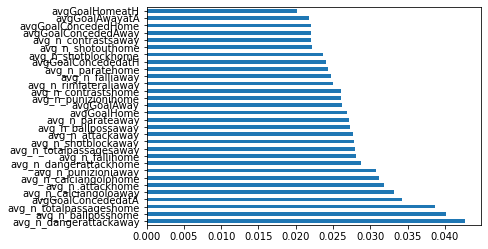

In [162]:
best_rf = rf.fit(X,Y4)
feat_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')

In [163]:
fi=feat_importances.nlargest(30).index.tolist()
Xfi=X[fi]


In [165]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,Xfi,Y1,cv=5)
print(cv)
print(cv.mean())


[0.63636364 0.62121212 0.6969697  0.72727273 0.68181818]
0.6727272727272726


In [208]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.33, random_state=42)
X_train.columns

Index(['avg_n_FirstTimeGolHome', 'avg_n_FirstTimeGolAway', 'avg_n_TotGolHome',
       'avg_n_TotGolAway', 'avg_n_ballposshome', 'avg_n_ballpossaway',
       'avg_n_shottargethome', 'avg_n_shottargetaway', 'avg_n_shotouthome',
       'avg_n_shotoutaway', 'avg_n_shotblockhome', 'avg_n_shotblockaway',
       'avg_n_punizionihome', 'avg_n_punizioniaway', 'avg_n_calciangolohome',
       'avg_n_calciangoloaway', 'avg_n_rimlateralihome',
       'avg_n_rimlateraliaway', 'avg_n_paratehome', 'avg_n_parateaway',
       'avg_n_fallihome', 'avg_n_falliaway', 'avg_n_redcardhome',
       'avg_n_redcardaway', 'avg_n_yellowcardhome', 'avg_n_yellowcardaway',
       'avg_n_totalpassageshome', 'avg_n_totalpassagesaway',
       'avg_n_contrastshome', 'avg_n_contrastsaway', 'avg_n_attackhome',
       'avg_n_attackaway', 'avg_n_dangerattackhome', 'avg_n_dangerattackaway',
       'Hour', 'avgGoalHomeatH', 'avgGoalConcededatH', 'avgGoalAwayatA',
       'avgGoalConcededatA', 'avgGoalHome', 'avgGoalConcededHome'

In [187]:
len(X_train.columns)

30

Index(['avg_n_dangerattackaway', 'avg_n_ballposshome',
       'avg_n_totalpassageshome', 'avgGoalConcededatA',
       'avg_n_calciangoloaway', 'avg_n_attackhome', 'avg_n_calciangolohome',
       'avg_n_punizioniaway', 'avg_n_dangerattackhome', 'avg_n_fallihome',
       'avg_n_totalpassagesaway', 'avg_n_shotblockaway', 'avg_n_attackaway',
       'avg_n_ballpossaway', 'avg_n_parateaway', 'avgGoalHome', 'avgGoalAway',
       'avg_n_punizionihome', 'avg_n_contrastshome', 'avg_n_rimlateraliaway',
       'avg_n_falliaway', 'avg_n_paratehome', 'avgGoalConcededatH',
       'avg_n_shotblockhome', 'avg_n_shotouthome', 'avg_n_contrastsaway',
       'avgGoalConcededAway', 'avgGoalConcededHome', 'avgGoalAwayatA',
       'avgGoalHomeatH'],
      dtype='object')

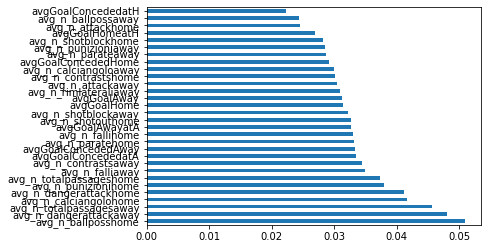

In [168]:
best_rf = rf.fit(X_train,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(30).plot(kind='barh')

X_train.columns

In [169]:
y_pred = best_rf.predict(X_test)
y_pred=pd.Series(y_pred)

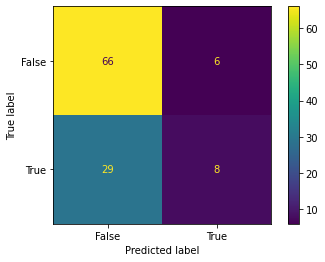

In [170]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()


In [171]:

# fit model no training data
xgb = XGBClassifier()
cv=cross_val_score(xgb,X,Y,cv=5)
print(cv)
print(cv.mean())

[0.68181818 0.62121212 0.63636364 0.63636364 0.65151515]
0.6454545454545454


In [172]:
# fit model no training data
xgb = XGBClassifier()
cv=cross_val_score(xgb,X,Y1,cv=5)
print(cv)
print(cv.mean())

[0.63636364 0.63636364 0.60606061 0.66666667 0.57575758]
0.6242424242424243


In [464]:
# fit model no training data
xgb = XGBClassifier()
cv=cross_val_score(xgb,X,Y2,cv=5)
print(cv)
print(cv.mean())

[0.57894737 0.64473684 0.65789474 0.57894737 0.64473684]
0.6210526315789474


In [206]:
svc = SVC()
cv = cross_val_score(svc,X,Y,cv=5)
print(cv)
print(cv.mean())

[0.6969697  0.6969697  0.6969697  0.71212121 0.71212121]
0.7030303030303029


In [216]:
y_test.value_counts()

0    75
1    34
Name: WinAwayTeam1st, dtype: int64

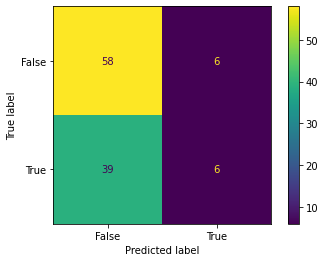

In [311]:
X_train, X_test, y_train, y_test = train_test_split( X, Y5, test_size=0.33, random_state=42)
rf.fit(X_train,y_train)
y_pred =rf.predict(X_test)
y_pred=pd.Series(y_pred)

import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [203]:
svc = SVC()
cv = cross_val_score(svc,X,Y1,cv=5)
print(cv)
print(cv.mean())

[0.66666667 0.65151515 0.65151515 0.65151515 0.65151515]
0.6545454545454545


In [204]:
svc = SVC()
cv = cross_val_score(svc,X,Y,cv=5)
print(cv)
print(cv.mean())

[0.6969697  0.6969697  0.6969697  0.71212121 0.71212121]
0.7030303030303029


In [175]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [190]:
# define the keras model
model = Sequential()
model.add(Dropout(0.8, input_shape=(30,)))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.8, input_shape=(106,)))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.6, input_shape=(106,)))
model.add(Dense(1, activation='sigmoid'))

In [191]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/50
20/20 [==============================] - 1s 12ms/step - loss: 78.1923 - accuracy: 0.5455 - val_loss: 1.6314 - val_accuracy: 0.5652
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 34.5951 - accuracy: 0.5859 - val_loss: 1.4546 - val_accuracy: 0.6087
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 42.8189 - accuracy: 0.6111 - val_loss: 1.2513 - val_accuracy: 0.6522
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 63.1453 - accuracy: 0.6263 - val_loss: 1.0099 - val_accuracy: 0.6522
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 46.1999 - accuracy: 0.5859 - val_loss: 0.8975 - val_accuracy: 0.6522
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 16.9583 - accuracy: 0.6010 - val_loss: 0.8052 - val_accuracy: 0.6957
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 21.8963 - accuracy: 0.6566 - val_loss: 0.7423 - val_accuracy: 0.6522
Epoch 8/50
2

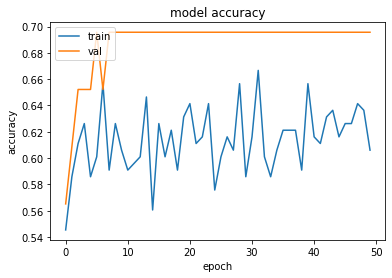

In [193]:
import keras
from matplotlib import pyplot as plt
history = model.fit(X_train, y_train,validation_split = 0.1, epochs=50, batch_size=10)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
...
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=10)

In [198]:
# evaluate the keras model
accuracy = model.evaluate(X_test, y_test)
print(accuracy)

4/4 [==============================] - 0s 3ms/step - loss: 0.6465 - accuracy: 0.6606
[0.6464985013008118, 0.6605504751205444]


In [200]:
y_pred=model.predict(X_test)


In [202]:
matrix = metrics.confusion_matrix(y_test, y_pred)

ValueError: ignored